<font size = 6><b> Projet de fin d'étude:</b></font>


Etude de performances de x264, le convertisseur de vidéos


--

<font color="red" size = 5><I>Import des données</I></font>

Le script doit être placé dans x264-inputsensitivity-master, le fichier contenant les données, pour que l'import fonctionne.

Selon les os, les vidéos ne sont pas importées dans le même ordre, d'où la liste exhaustive des adresses dans l'import.

--

In [24]:
import os
import pandas

# on se crée une liste d'adresses disques contenant les vidéos
listeAdresse = ['./data/x264-1908-caire-wasm/x264-results1.csv',
 './data/x264-0408-deadline-wasm/x264-results1.csv',
 './data/x264-0308-news-wasm/x264-results1.csv',
 './data/x264-2108-forester-wasm/x264-results1.csv',
 './data/x264-0308-crowd_run-wasm/x264-results1.csv',
 './data/x264-1908-flower-wasm/x264-results1.csv',
 './data/x264-0308-mobilesif-wasm/x264-results1.csv',
 './data/x264-1908-footballcif-wasm/x264-results1.csv',
 './data/x264-2108-netflix-wasm/x264-results1.csv',
 './data/x264-1908-husky-wasm/x264-results1.csv',
 './data/x264-0608-people-wasm/x264-results1.csv',
 './data/x264-1908-bridgefar-wasm/x264-results1.csv',
 './data/x264-0308-sintel-wasm/x264-results1.csv',
 './data/x264-2108-bridgeclose-wasm/x264-results1.csv',
 './data/x264-0408-tos3k-wasm/x264-results1.csv',
 './data/x264-0208-crowd_run-bermuda-wasm/x264-results1.csv',
 './data/x264-0608-coastmp4-wasm-merged/x264-results1.csv',
 './data/x264-2108-ghotism-wasm/x264-results1.csv',
 './data/x264-0508-soccer-wasm/x264-results1.csv',
 './data/x264-0208-sintel-calda-wasm/x264-results1.csv',
 './data/x264-1908-ice-wasm/x264-results1.csv',
 './data/x264-0408-football-wasm/x264-results1.csv',
 './data/x264-1908-tennis-wasm/x264-results1.csv',
 './data/x264-1908-mobilepro-wasm/x264-results1.csv',
 './data/x264-1908-akiyo-wasm/x264-results1.csv',
 './data/x264-0608-park-wasm/x264-results1.csv',
 './data/x264-0608-blue-wasm/x264-results1.csv',
 './data/x264-1908-riverbed-wasm/x264-results1.csv',
 './data/x264-0608-tractor-wasm/x264-results1.csv',
 './data/x264-1908-football15-wasm/x264-results1.csv',
 './data/x264-1908-sunflowers-wasm/x264-results1.csv',
 './data/x264-0308-ducks-wasm/x264-results1.csv',
 './data/x264-1908-waterfall-wasm/x264-results1.csv',
 './data/x264-1908-students-wasm/x264-results1.csv']

# on liste les fichiers présents dedans
#adresseIni = os.listdir("./data")

# et on va chercher chacun des csv
#for video in adresseIni: 
#    listeRep = os.listdir("./data/" + video)
#    for rep in listeRep:
#       listeAdresse.append("./data/" + video + "/" + rep)

#on crée ensuite la liste des données sur chacune des vidéos
listeVideo = []

for adresse in listeAdresse:
    listeVideo.append(pandas.read_csv(open(adresse,"r")))

# on teste l'affichage des données de la première vidéo
listeVideo[0][0:5]
    

,configurationID,H264,no_8x8dct,no_asm,no_cabac,no_deblock,no_fast_pskip,no_mbtree,no_mixed_refs,no_weightb,rc_lookahead,ref,size,usertime,systemtime,elapsedtime
0,1,True,True,False,False,True,True,False,True,True,20,9,78801,1.336,0.068,0.695
1,10,True,True,False,True,False,True,False,False,True,40,9,86351,1.588,0.064,0.603
2,100,True,True,False,False,True,False,True,True,False,40,1,90758,0.928,0.036,0.284
3,1000,True,True,False,True,False,True,True,True,False,40,9,98511,1.348,0.020,0.415
4,1001,True,False,False,False,True,False,False,True,False,60,5,85191,1.072,0.044,0.362


<font color="red" size = 5><I>Matrices de corrélations</I></font>

--

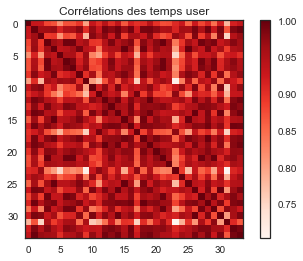

Les coefficicients des temps utilisateurs sont très corrélés, les coef. sont souvent > 0.8
C'est bon signe, on doit pourvoir trouver des paramètres optimaux
communs à toutes les vidéos pour diminuer les temps users


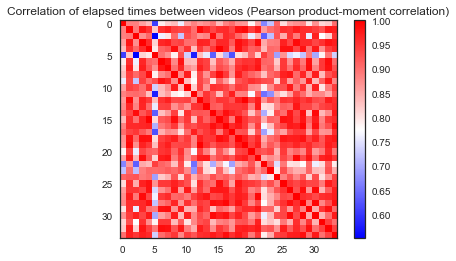

Les temps écoulés sont également fortement correlés entre les vidéos
Mais on peut voir une 'anomalie' dans certaines vidéos


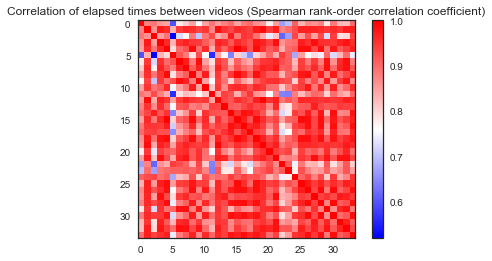

Les temps écoulés sont également fortement correlés entre les vidéos
Mais on peut voir une 'anomalie' dans certaines vidéos
Negligible difference between Spearman and Pearson:  0.02 -0.07 0.05
Min, max, mean, std of Spearman:  0.55 1.00 0.07 0.91


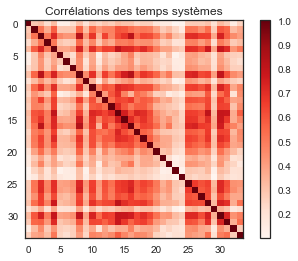

Les temps système sont moins corrélés linéairement, peut-être un autre type de relation


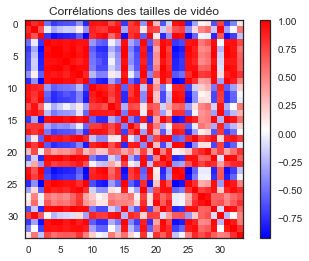

En revanche, les tailles des vidéos dépendent moins des paramètres d'entrée
Un paramètre peut donner une bonne qualité pour une vidéo mais une mauvaise pour une autre
Du coup, l'intérêt, c'est de classifier les vidéos pour comprendre l'influence des paramètres sur leur taille


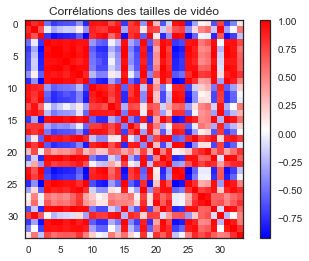

Negligible difference between Spearman and Pearson:  0.10 -0.39 0.15
Min, max, mean, std of Spearman:  -0.92 1.00 0.65 0.28


In [25]:
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt

from numpy import *

# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.spearmanr.html
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html

# on définit le nombre de vidéos, la taille de la liste des données
taille = len(listeVideo)

# Dans un premier temps, on cherche à calculer la matrice de coorélation des temps utilisateurs de conversion des vidéos
# Ici, on a 34 vidéos, c'est donc une matrice 34*34

corrTemps = [[0 for x in range(taille)] for y in range(taille)]

# pour chaque vidéo, on calcule sa corrélation (Pearson) avec toutes les autres

for i in range(taille):
    for j in range(taille):
        corrTemps[i][j] = np.corrcoef(listeVideo[i].usertime,listeVideo[j].usertime)[0,1]

# et on affiche la matrice des corrélations en couleur

plt.imshow(corrTemps,cmap='Reds',interpolation='nearest')
plt.title('Corrélations des temps user')
plt.colorbar()
plt.show()

print("Les coefficicients des temps utilisateurs sont très corrélés, les coef. sont souvent > 0.8")
print("C'est bon signe, on doit pourvoir trouver des paramètres optimaux")
print("communs à toutes les vidéos pour diminuer les temps users")


# On applique le même programme pour le temps écoulé

corrElap= [[0 for x in range(taille)] for y in range(taille)]

for i in range(taille):
    for j in range(taille):
        corrElap[i][j] = np.corrcoef(listeVideo[i]['elapsedtime'],listeVideo[j]['elapsedtime'])[0,1]
        
plt.imshow(corrElap,cmap='bwr',interpolation='nearest')
plt.title('Correlation of elapsed times between videos (Pearson product-moment correlation)')
plt.colorbar()
plt.show()

print("Les temps écoulés sont également fortement correlés entre les vidéos")
print("Mais on peut voir une 'anomalie' dans certaines vidéos")

corrElapSpearman= [[0 for x in range(taille)] for y in range(taille)]

for i in range(taille):
    for j in range(taille):
        corrElapSpearman[i][j] = stats.spearmanr(listeVideo[i]['elapsedtime'],listeVideo[j]['elapsedtime']).correlation
        
plt.imshow(corrElapSpearman,cmap='bwr',interpolation='nearest')
plt.title('Correlation of elapsed times between videos (Spearman rank-order correlation coefficient)')
plt.colorbar()
plt.show()

print("Les temps écoulés sont également fortement correlés entre les vidéos")
print("Mais on peut voir une 'anomalie' dans certaines vidéos")

# no difference between Spearman and Pearson 
dElap = np.subtract(corrElap, corrElapSpearman)
print("Negligible difference between Spearman and Pearson:  %.2f %.2f %.2f" % (np.std(dElap), np.min(dElap), np.max(dElap)))


print("Min, max, mean, std of Spearman:  %.2f %.2f %.2f %.2f" % (np.min(corrElap), np.max(corrElap), np.std(corrElap), np.mean(corrElap)))




# On applique le même programme pour le temps système

corrSys= [[0 for x in range(taille)] for y in range(taille)]

for i in range(taille):
    for j in range(taille):
        corrSys[i][j] = np.corrcoef(listeVideo[i]['systemtime'],listeVideo[j]['systemtime'])[0,1]

plt.imshow(corrSys,cmap='Reds',interpolation='nearest')
plt.title('Corrélations des temps systèmes')
plt.colorbar()
plt.show()

print("Les temps système sont moins corrélés linéairement, peut-être un autre type de relation")

# Enfin, on calcule la matrice des corrélations relative aux tailles

corrTaille = [[0 for x in range(taille)] for y in range(taille)]

for i in range(taille):
    for j in range(taille):
        corrTaille[i][j] = np.corrcoef(listeVideo[i]['size'],listeVideo[j]['size'])[0,1]

plt.imshow(corrTaille,cmap='bwr',interpolation='nearest')
plt.title('Corrélations des tailles de vidéo')
plt.colorbar()
plt.show()

print("En revanche, les tailles des vidéos dépendent moins des paramètres d'entrée")
print("Un paramètre peut donner une bonne qualité pour une vidéo mais une mauvaise pour une autre")
print("Du coup, l'intérêt, c'est de classifier les vidéos pour comprendre l'influence des paramètres sur leur taille")


corrTailleSpearman = [[0 for x in range(taille)] for y in range(taille)]

for i in range(taille):
    for j in range(taille):
        corrTailleSpearman[i][j] = stats.spearmanr(listeVideo[i]['size'],listeVideo[j]['size']).correlation 
 

plt.imshow(corrTaille,cmap='bwr',interpolation='nearest') # origin='bottom',
plt.title('Corrélations des tailles de vidéo')
plt.colorbar()
plt.show()



# no difference between Spearman and Pearson 
dTaille = np.subtract(corrTaille, corrTailleSpearman)
print("Negligible difference between Spearman and Pearson:  %.2f %.2f %.2f" % (np.std(dTaille), np.min(dTaille), np.max(dTaille)))


print("Min, max, mean, std of Spearman:  %.2f %.2f %.2f %.2f" % (np.min(corrTaille), np.max(corrTaille), np.std(corrTaille), np.mean(corrTaille)))




<font color="red" size = 5><I>Do inputs change the performance distributions?</I></font>

--

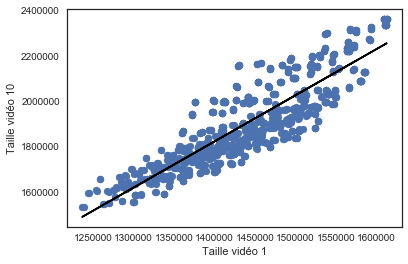

Un exemple ou la regression linéaire passe bien


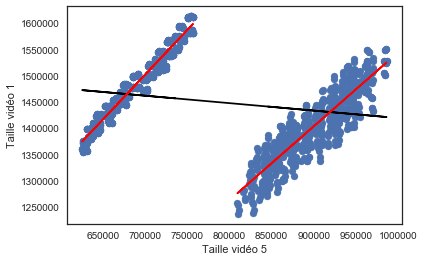

Mais avec la fameuse exception, la vidéo 5, on tombe sur un cas où on doit trouver d'autres méthodes
La figure laisse penser qu'il y a une distinction entre deux groupes de paramètres, assez homogènes
Un des objectifs du projet sera de les identifier
et de voir lesquels correspondent le mieux aux différents types de vidéos


In [26]:
from scipy import stats

import numpy as np
import matplotlib.pyplot as plt

x = listeVideo[1]['size']
y = listeVideo[10]['size']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
predict = slope*x+intercept

plt.scatter(x,y)
plt.xlabel("Taille vidéo 1")
plt.ylabel("Taille vidéo 10")
plt.plot(x,slope*x+intercept,color="black")
plt.show()

print("Un exemple ou la regression linéaire passe bien")


x = listeVideo[5]['size']
y = listeVideo[1]['size']

plt.scatter(x,y)
plt.xlabel("Taille vidéo 5")
plt.ylabel("Taille vidéo 1")

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
predict = slope*x+intercept
plt.plot(x,predict,color="black")

xm = x[x<800000]
ym = y[x<800000]

slope, intercept, r_value, p_value, std_err = stats.linregress(xm, ym)
predictm = slope*xm+intercept
plt.plot(xm,predictm,color="red")

xp = x[x>=800000]
yp = y[x>=800000]

slope, intercept, r_value, p_value, std_err = stats.linregress(xp, yp)
predictp = slope*xp+intercept
plt.plot(xp,predictp,color="red")

plt.show()

print("Mais avec la fameuse exception, la vidéo 5, on tombe sur un cas où on doit trouver d'autres méthodes")
print("La figure laisse penser qu'il y a une distinction entre deux groupes de paramètres, assez homogènes")
print("Un des objectifs du projet sera de les identifier")
print("et de voir lesquels correspondent le mieux aux différents types de vidéos")

<font color="red" size = 5><I>Classification des paramètres</I></font>

--

<font color="grey" size = 4><I>K-means pour créer des classes de paramètres </I></font>

--

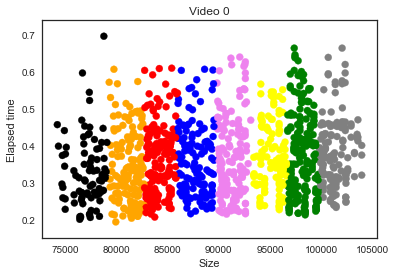

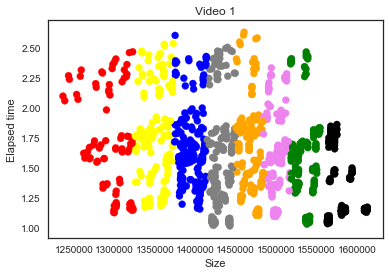

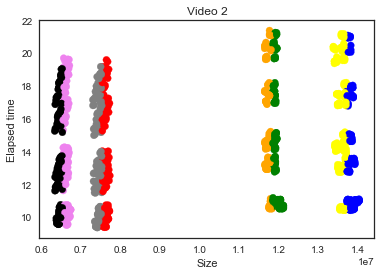

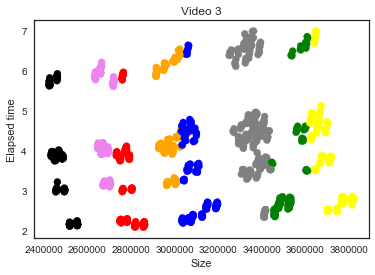

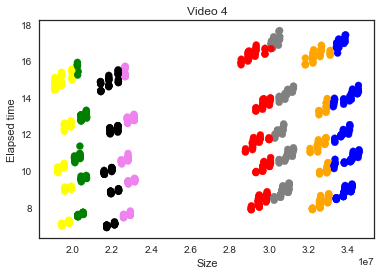

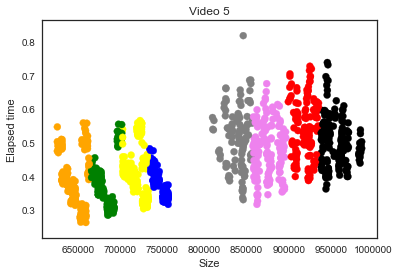

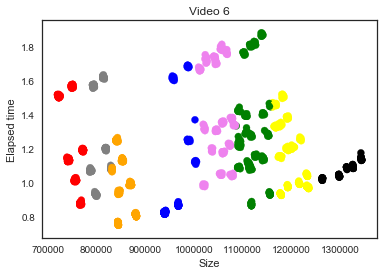

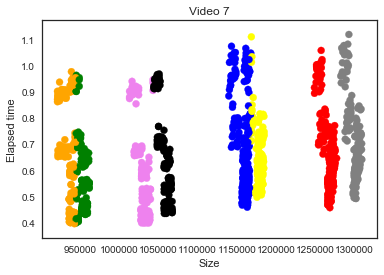

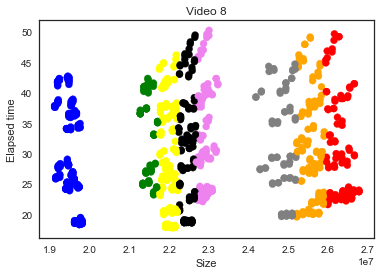

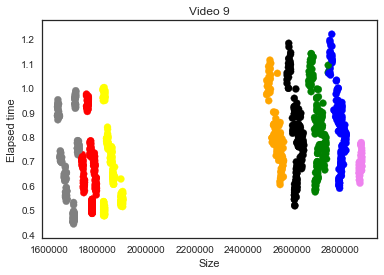

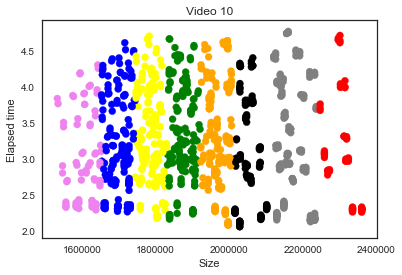

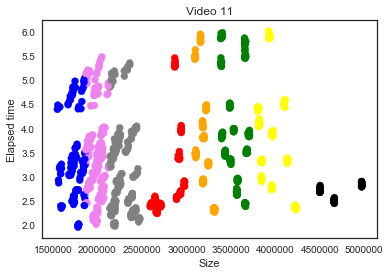

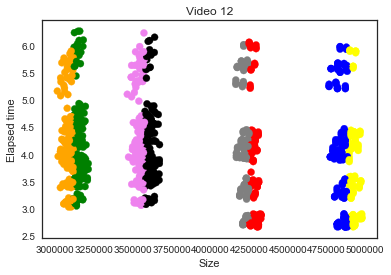

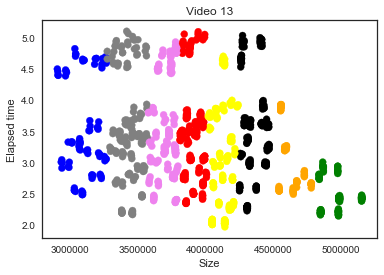

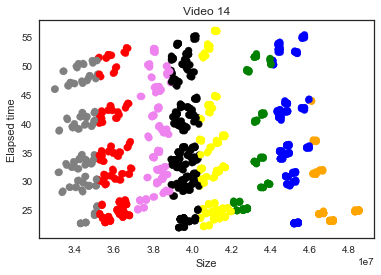

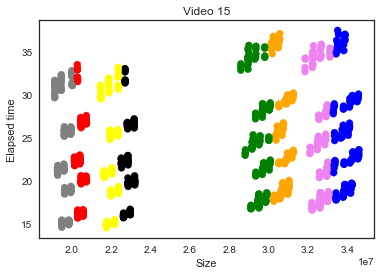

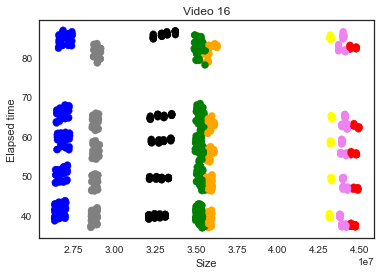

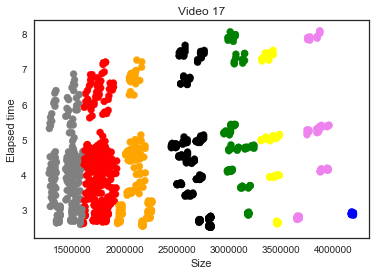

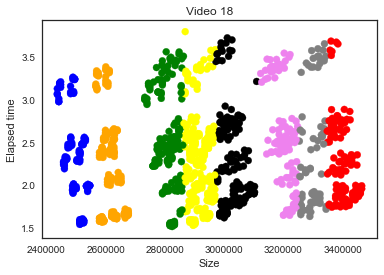

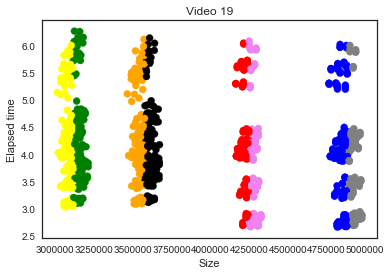

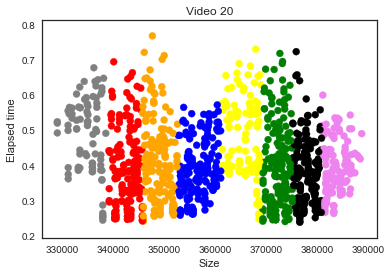

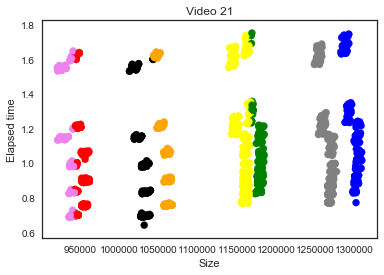

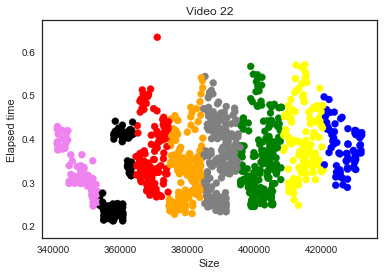

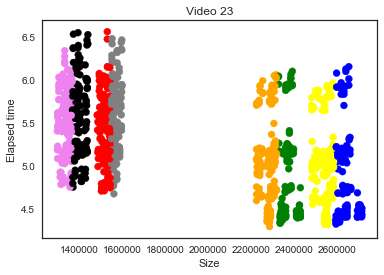

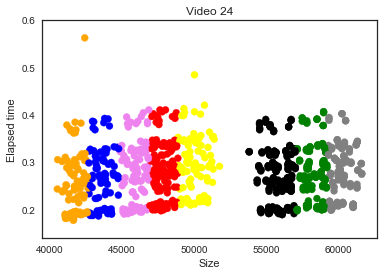

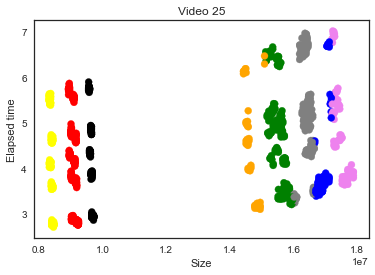

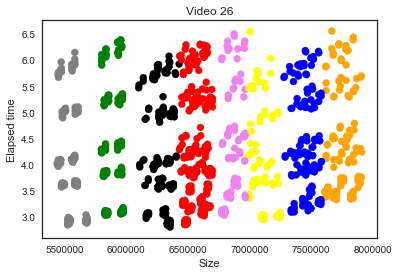

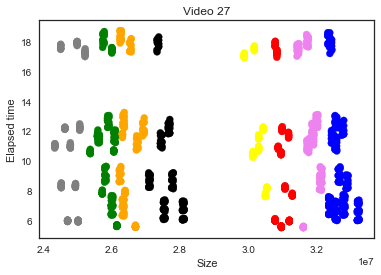

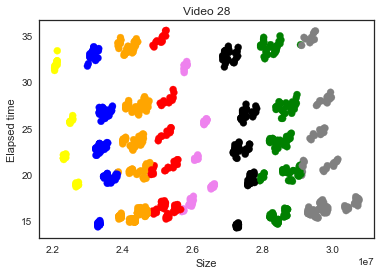

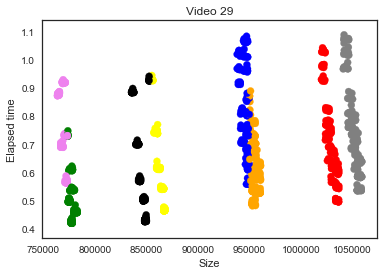

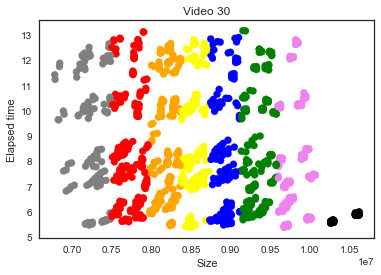

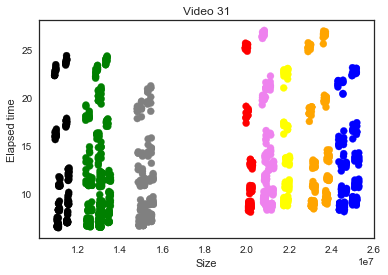

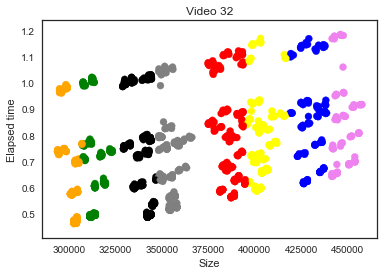

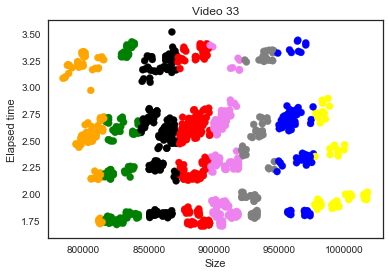

In [27]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans

for j in range(len(listeVideo)):
    
    video = listeVideo[j]
    etime = video['elapsedtime']
    taille = video['size']

    kmeans = KMeans(n_clusters=8)
    classes =    kmeans.fit(video)
    tab = classes.predict(video)
    couleur = ["red","green","blue","black","grey","yellow","orange","violet"]
    col = ["a"]*len(tab)

    for i in range(len(tab)):
        ind = tab[i]
        col[i] = couleur[ind]

    # on trace le graphe elapsed time*size, mais avec les différents groupes correspondants aux différentes couleurs

    plt.scatter(taille,etime,color=col)
    plt.title("Video "+ str(j))
    plt.ylabel("Elapsed time")
    plt.xlabel("Size")
    plt.show()

Les k-means découpent toujours suivant des portions de taille, 'size' doit jouer énormément dans les résultats, plus que le temps écoulé en comparaison.

Il faudra tester d'autres méthodes de classification (cah, ou cart) pour vérifier cela.

Un autre point important, est qu'il y a souvent une ou plusieurs coupure(s) horizontale(s) en terme de temps écoulé, ce qui laisse présager que pour ce type de vidéo, il y a des bons et des mauvais paramètres à taille de sortie égale.

Est-ce qu'on cherche à minimiser ou à maximiser 'size', en fonction de si on préfère la performance ou la qualité?

<font color="red" size=4>Random forest</font>

--

Video 0: 
Feature ranking:
1. feature ref 9 (0.633265)
2. feature no_mixed_refs 6 (0.152795)
3. feature no_fast_pskip 4 (0.064272)
4. feature rc_lookahead 8 (0.034452)
5. feature no_mbtree 5 (0.028560)
6. feature no_8x8dct 0 (0.025415)
7. feature no_cabac 2 (0.020996)
8. feature no_weightb 7 (0.020828)
9. feature no_deblock 3 (0.019416)
10. feature no_asm 1 (0.000000)


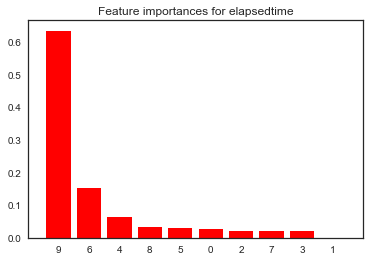

Prediction score: 9.13
Video 1: 
Feature ranking:
1. feature ref 9 (0.695233)
2. feature no_mixed_refs 6 (0.214563)
3. feature no_mbtree 5 (0.037558)
4. feature rc_lookahead 8 (0.021135)
5. feature no_fast_pskip 4 (0.014445)
6. feature no_8x8dct 0 (0.012791)
7. feature no_cabac 2 (0.001979)
8. feature no_deblock 3 (0.001286)
9. feature no_weightb 7 (0.001011)
10. feature no_asm 1 (0.000000)


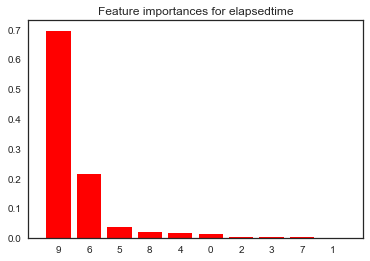

Prediction score: 1.50
Video 2: 
Feature ranking:
1. feature ref 9 (0.890757)
2. feature no_mixed_refs 6 (0.054673)
3. feature no_mbtree 5 (0.037294)
4. feature no_fast_pskip 4 (0.007301)
5. feature rc_lookahead 8 (0.005131)
6. feature no_8x8dct 0 (0.004105)
7. feature no_cabac 2 (0.000458)
8. feature no_deblock 3 (0.000150)
9. feature no_weightb 7 (0.000129)
10. feature no_asm 1 (0.000000)


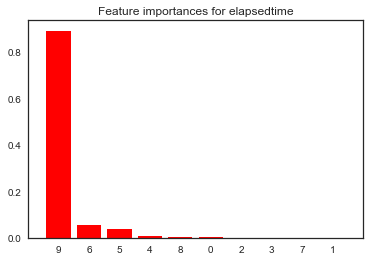

Prediction score: 0.52
Video 3: 
Feature ranking:
1. feature ref 9 (0.741016)
2. feature no_mixed_refs 6 (0.211354)
3. feature no_mbtree 5 (0.036097)
4. feature rc_lookahead 8 (0.005837)
5. feature no_8x8dct 0 (0.004243)
6. feature no_deblock 3 (0.000603)
7. feature no_fast_pskip 4 (0.000443)
8. feature no_cabac 2 (0.000234)
9. feature no_weightb 7 (0.000173)
10. feature no_asm 1 (0.000000)


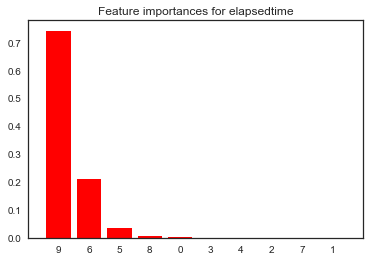

Prediction score: 0.79
Video 4: 
Feature ranking:
1. feature ref 9 (0.854335)
2. feature no_mixed_refs 6 (0.079478)
3. feature no_mbtree 5 (0.051533)
4. feature no_8x8dct 0 (0.009353)
5. feature rc_lookahead 8 (0.002893)
6. feature no_fast_pskip 4 (0.000923)
7. feature no_deblock 3 (0.000909)
8. feature no_cabac 2 (0.000406)
9. feature no_weightb 7 (0.000170)
10. feature no_asm 1 (0.000000)


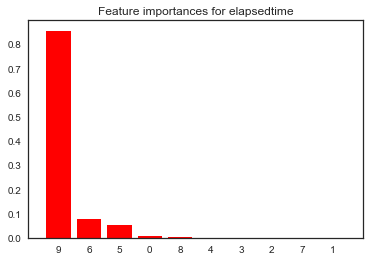

Prediction score: 0.59
Video 5: 
Feature ranking:
1. feature ref 9 (0.358608)
2. feature no_mbtree 5 (0.351691)
3. feature no_mixed_refs 6 (0.125316)
4. feature rc_lookahead 8 (0.073483)
5. feature no_cabac 2 (0.041461)
6. feature no_8x8dct 0 (0.020595)
7. feature no_weightb 7 (0.010097)
8. feature no_deblock 3 (0.009518)
9. feature no_fast_pskip 4 (0.009231)
10. feature no_asm 1 (0.000000)


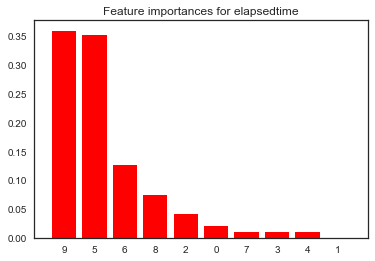

Prediction score: 3.59
Video 6: 
Feature ranking:
1. feature ref 9 (0.549872)
2. feature no_mixed_refs 6 (0.296337)
3. feature no_mbtree 5 (0.109317)
4. feature no_cabac 2 (0.020425)
5. feature rc_lookahead 8 (0.013294)
6. feature no_8x8dct 0 (0.009835)
7. feature no_deblock 3 (0.000470)
8. feature no_fast_pskip 4 (0.000249)
9. feature no_weightb 7 (0.000202)
10. feature no_asm 1 (0.000000)


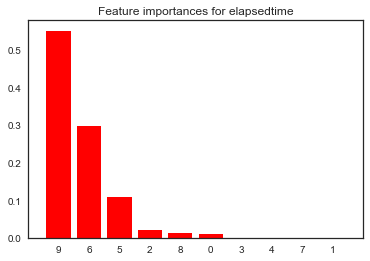

Prediction score: 0.36
Video 7: 
Feature ranking:
1. feature ref 9 (0.593042)
2. feature no_mixed_refs 6 (0.265313)
3. feature no_mbtree 5 (0.086351)
4. feature rc_lookahead 8 (0.028281)
5. feature no_8x8dct 0 (0.013326)
6. feature no_cabac 2 (0.003617)
7. feature no_fast_pskip 4 (0.003557)
8. feature no_weightb 7 (0.003321)
9. feature no_deblock 3 (0.003190)
10. feature no_asm 1 (0.000000)


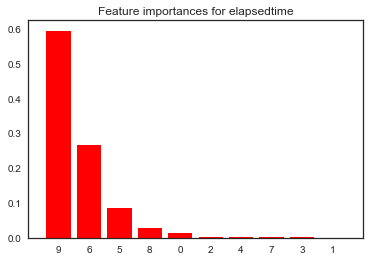

Prediction score: 3.18
Video 8: 
Feature ranking:
1. feature ref 9 (0.865801)
2. feature no_mbtree 5 (0.054816)
3. feature no_mixed_refs 6 (0.044949)
4. feature rc_lookahead 8 (0.016550)
5. feature no_fast_pskip 4 (0.014209)
6. feature no_8x8dct 0 (0.001427)
7. feature no_cabac 2 (0.001399)
8. feature no_deblock 3 (0.000560)
9. feature no_weightb 7 (0.000289)
10. feature no_asm 1 (0.000000)


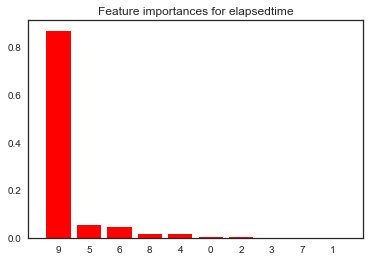

Prediction score: 0.90
Video 9: 
Feature ranking:
1. feature ref 9 (0.541584)
2. feature no_mixed_refs 6 (0.221078)
3. feature no_mbtree 5 (0.166231)
4. feature rc_lookahead 8 (0.023964)
5. feature no_8x8dct 0 (0.017419)
6. feature no_cabac 2 (0.016337)
7. feature no_deblock 3 (0.004615)
8. feature no_fast_pskip 4 (0.004558)
9. feature no_weightb 7 (0.004214)
10. feature no_asm 1 (0.000000)


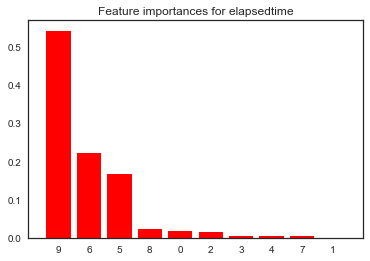

Prediction score: 2.84
Video 10: 
Feature ranking:
1. feature ref 9 (0.847965)
2. feature no_mbtree 5 (0.039009)
3. feature no_mixed_refs 6 (0.038517)
4. feature rc_lookahead 8 (0.035408)
5. feature no_fast_pskip 4 (0.026391)
6. feature no_8x8dct 0 (0.004147)
7. feature no_deblock 3 (0.004142)
8. feature no_cabac 2 (0.003562)
9. feature no_weightb 7 (0.000859)
10. feature no_asm 1 (0.000000)


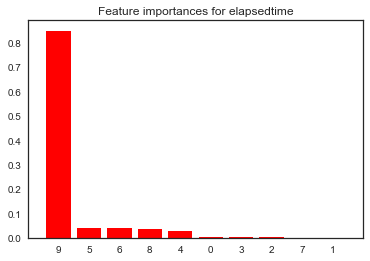

Prediction score: 1.27
Video 11: 
Feature ranking:
1. feature ref 9 (0.604507)
2. feature no_mixed_refs 6 (0.300596)
3. feature no_mbtree 5 (0.051425)
4. feature no_8x8dct 0 (0.032300)
5. feature rc_lookahead 8 (0.005233)
6. feature no_deblock 3 (0.003945)
7. feature no_fast_pskip 4 (0.000866)
8. feature no_cabac 2 (0.000751)
9. feature no_weightb 7 (0.000377)
10. feature no_asm 1 (0.000000)


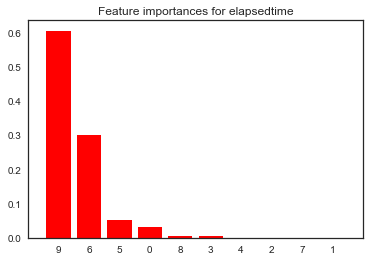

Prediction score: 1.09
Video 12: 
Feature ranking:
1. feature ref 9 (0.660883)
2. feature no_mixed_refs 6 (0.219996)
3. feature no_mbtree 5 (0.064475)
4. feature rc_lookahead 8 (0.028380)
5. feature no_8x8dct 0 (0.015270)
6. feature no_fast_pskip 4 (0.008718)
7. feature no_weightb 7 (0.001012)
8. feature no_cabac 2 (0.000714)
9. feature no_deblock 3 (0.000552)
10. feature no_asm 1 (0.000000)


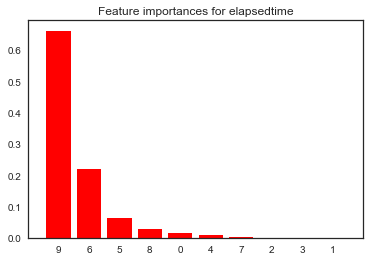

Prediction score: 0.92
Video 13: 
Feature ranking:
1. feature ref 9 (0.676328)
2. feature no_mixed_refs 6 (0.266201)
3. feature no_8x8dct 0 (0.023570)
4. feature no_mbtree 5 (0.015861)
5. feature no_cabac 2 (0.008483)
6. feature rc_lookahead 8 (0.007958)
7. feature no_deblock 3 (0.000588)
8. feature no_weightb 7 (0.000512)
9. feature no_fast_pskip 4 (0.000499)
10. feature no_asm 1 (0.000000)


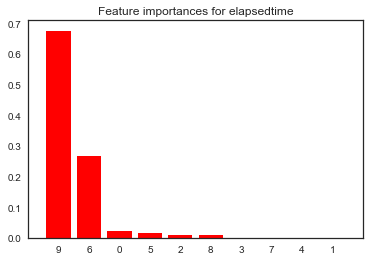

Prediction score: 1.10
Video 14: 
Feature ranking:
1. feature ref 9 (0.879054)
2. feature no_mixed_refs 6 (0.092291)
3. feature no_mbtree 5 (0.010771)
4. feature no_8x8dct 0 (0.006495)
5. feature no_fast_pskip 4 (0.005868)
6. feature rc_lookahead 8 (0.002881)
7. feature no_cabac 2 (0.001658)
8. feature no_deblock 3 (0.000899)
9. feature no_weightb 7 (0.000084)
10. feature no_asm 1 (0.000000)


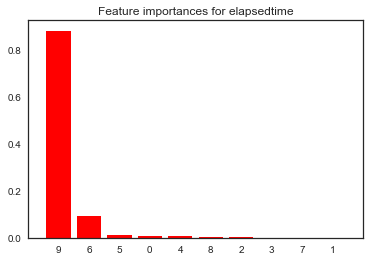

Prediction score: 0.46
Video 15: 
Feature ranking:
1. feature ref 9 (0.833243)
2. feature no_mixed_refs 6 (0.091775)
3. feature no_mbtree 5 (0.058327)
4. feature no_8x8dct 0 (0.009532)
5. feature rc_lookahead 8 (0.003745)
6. feature no_fast_pskip 4 (0.001820)
7. feature no_deblock 3 (0.000813)
8. feature no_cabac 2 (0.000436)
9. feature no_weightb 7 (0.000308)
10. feature no_asm 1 (0.000000)


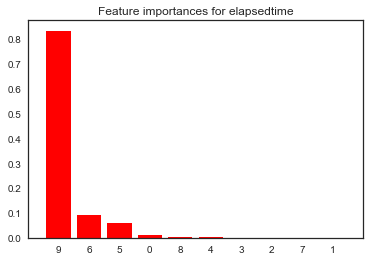

Prediction score: 0.95
Video 16: 
Feature ranking:
1. feature ref 9 (0.834783)
2. feature no_mixed_refs 6 (0.153445)
3. feature no_8x8dct 0 (0.005980)
4. feature rc_lookahead 8 (0.002838)
5. feature no_mbtree 5 (0.002175)
6. feature no_cabac 2 (0.000293)
7. feature no_deblock 3 (0.000221)
8. feature no_weightb 7 (0.000153)
9. feature no_fast_pskip 4 (0.000111)
10. feature no_asm 1 (0.000000)


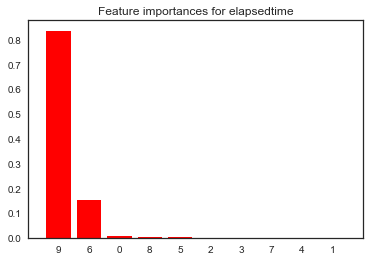

Prediction score: 0.59
Video 17: 
Feature ranking:
1. feature ref 9 (0.699628)
2. feature no_mixed_refs 6 (0.216688)
3. feature no_mbtree 5 (0.040295)
4. feature no_8x8dct 0 (0.017711)
5. feature no_deblock 3 (0.011686)
6. feature rc_lookahead 8 (0.006740)
7. feature no_fast_pskip 4 (0.005811)
8. feature no_cabac 2 (0.001093)
9. feature no_weightb 7 (0.000348)
10. feature no_asm 1 (0.000000)


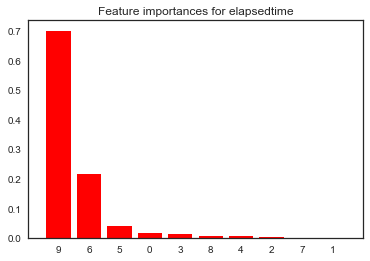

Prediction score: 1.03
Video 18: 
Feature ranking:
1. feature ref 9 (0.781160)
2. feature no_mixed_refs 6 (0.158589)
3. feature no_mbtree 5 (0.036740)
4. feature rc_lookahead 8 (0.008848)
5. feature no_8x8dct 0 (0.007319)
6. feature no_fast_pskip 4 (0.003943)
7. feature no_deblock 3 (0.001375)
8. feature no_cabac 2 (0.001132)
9. feature no_weightb 7 (0.000895)
10. feature no_asm 1 (0.000000)


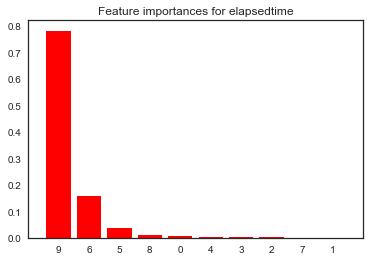

Prediction score: 1.17
Video 19: 
Feature ranking:
1. feature ref 9 (0.660490)
2. feature no_mixed_refs 6 (0.218894)
3. feature no_mbtree 5 (0.064275)
4. feature rc_lookahead 8 (0.029235)
5. feature no_8x8dct 0 (0.016080)
6. feature no_fast_pskip 4 (0.008805)
7. feature no_weightb 7 (0.000893)
8. feature no_cabac 2 (0.000736)
9. feature no_deblock 3 (0.000591)
10. feature no_asm 1 (0.000000)


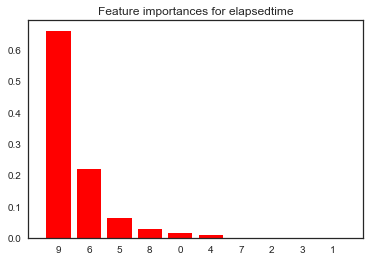

Prediction score: 0.83
Video 20: 
Feature ranking:
1. feature ref 9 (0.573425)
2. feature no_mixed_refs 6 (0.176570)
3. feature no_mbtree 5 (0.148124)
4. feature rc_lookahead 8 (0.053585)
5. feature no_8x8dct 0 (0.012260)
6. feature no_fast_pskip 4 (0.011404)
7. feature no_deblock 3 (0.008376)
8. feature no_cabac 2 (0.008316)
9. feature no_weightb 7 (0.007940)
10. feature no_asm 1 (0.000000)


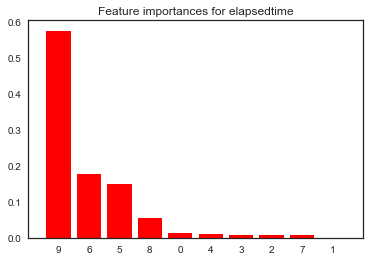

Prediction score: 4.61
Video 21: 
Feature ranking:
1. feature ref 9 (0.621842)
2. feature no_mixed_refs 6 (0.322895)
3. feature no_mbtree 5 (0.033220)
4. feature no_8x8dct 0 (0.011623)
5. feature rc_lookahead 8 (0.009091)
6. feature no_fast_pskip 4 (0.000473)
7. feature no_weightb 7 (0.000320)
8. feature no_deblock 3 (0.000292)
9. feature no_cabac 2 (0.000244)
10. feature no_asm 1 (0.000000)


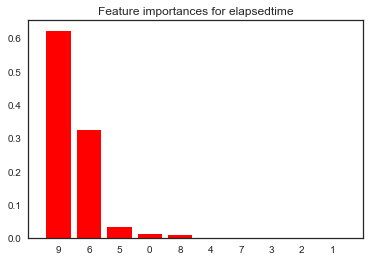

Prediction score: 0.50
Video 22: 
Feature ranking:
1. feature ref 9 (0.439565)
2. feature no_mbtree 5 (0.232631)
3. feature no_mixed_refs 6 (0.123656)
4. feature rc_lookahead 8 (0.103868)
5. feature no_cabac 2 (0.032251)
6. feature no_8x8dct 0 (0.025932)
7. feature no_deblock 3 (0.014731)
8. feature no_fast_pskip 4 (0.013880)
9. feature no_weightb 7 (0.013487)
10. feature no_asm 1 (0.000000)


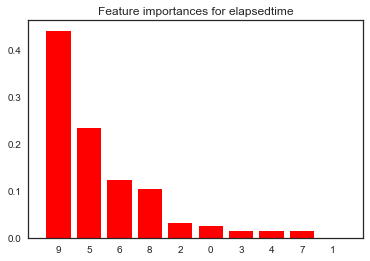

Prediction score: 4.81
Video 23: 
Feature ranking:
1. feature ref 9 (0.548685)
2. feature no_mbtree 5 (0.281231)
3. feature no_mixed_refs 6 (0.098892)
4. feature rc_lookahead 8 (0.038811)
5. feature no_fast_pskip 4 (0.013652)
6. feature no_8x8dct 0 (0.008123)
7. feature no_cabac 2 (0.003804)
8. feature no_deblock 3 (0.003573)
9. feature no_weightb 7 (0.003229)
10. feature no_asm 1 (0.000000)


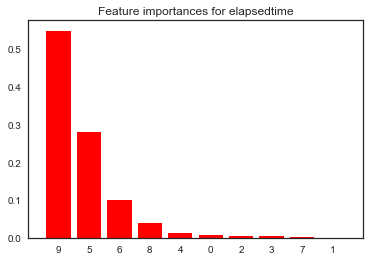

Prediction score: 1.22
Video 24: 
Feature ranking:
1. feature ref 9 (0.796619)
2. feature no_fast_pskip 4 (0.091956)
3. feature no_mixed_refs 6 (0.063721)
4. feature rc_lookahead 8 (0.013878)
5. feature no_cabac 2 (0.010724)
6. feature no_mbtree 5 (0.007804)
7. feature no_8x8dct 0 (0.006775)
8. feature no_deblock 3 (0.005230)
9. feature no_weightb 7 (0.003293)
10. feature no_asm 1 (0.000000)


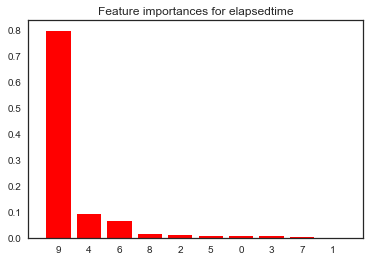

Prediction score: 1.26
Video 25: 
Feature ranking:
1. feature ref 9 (0.771486)
2. feature no_mbtree 5 (0.103302)
3. feature no_mixed_refs 6 (0.101910)
4. feature rc_lookahead 8 (0.011655)
5. feature no_8x8dct 0 (0.008253)
6. feature no_cabac 2 (0.001974)
7. feature no_deblock 3 (0.000490)
8. feature no_fast_pskip 4 (0.000479)
9. feature no_weightb 7 (0.000451)
10. feature no_asm 1 (0.000000)


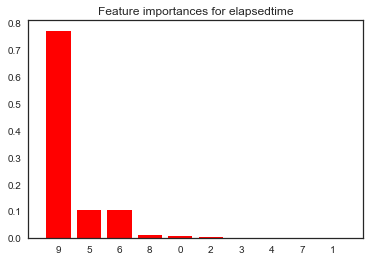

Prediction score: 1.04
Video 26: 
Feature ranking:
1. feature ref 9 (0.897516)
2. feature no_mixed_refs 6 (0.056885)
3. feature no_mbtree 5 (0.016599)
4. feature rc_lookahead 8 (0.014491)
5. feature no_8x8dct 0 (0.009598)
6. feature no_fast_pskip 4 (0.002316)
7. feature no_deblock 3 (0.001073)
8. feature no_cabac 2 (0.000832)
9. feature no_weightb 7 (0.000690)
10. feature no_asm 1 (0.000000)


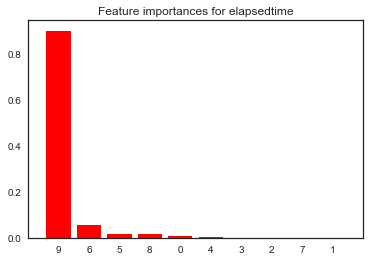

Prediction score: 1.05
Video 27: 
Feature ranking:
1. feature ref 9 (0.702403)
2. feature no_mixed_refs 6 (0.280423)
3. feature no_mbtree 5 (0.009351)
4. feature rc_lookahead 8 (0.004144)
5. feature no_8x8dct 0 (0.002965)
6. feature no_cabac 2 (0.000246)
7. feature no_deblock 3 (0.000224)
8. feature no_fast_pskip 4 (0.000125)
9. feature no_weightb 7 (0.000120)
10. feature no_asm 1 (0.000000)


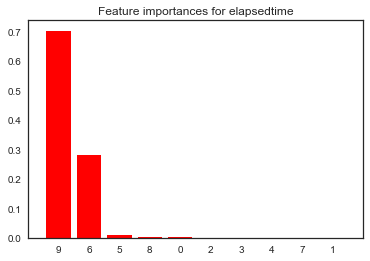

Prediction score: 0.68
Video 28: 
Feature ranking:
1. feature ref 9 (0.876392)
2. feature no_mixed_refs 6 (0.106635)
3. feature no_8x8dct 0 (0.007339)
4. feature no_mbtree 5 (0.004228)
5. feature no_deblock 3 (0.002127)
6. feature rc_lookahead 8 (0.001981)
7. feature no_fast_pskip 4 (0.000852)
8. feature no_cabac 2 (0.000258)
9. feature no_weightb 7 (0.000188)
10. feature no_asm 1 (0.000000)


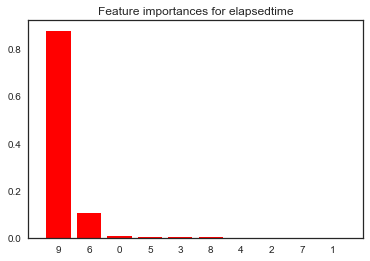

Prediction score: 0.80
Video 29: 
Feature ranking:
1. feature ref 9 (0.532544)
2. feature no_mixed_refs 6 (0.312144)
3. feature no_mbtree 5 (0.104319)
4. feature rc_lookahead 8 (0.031807)
5. feature no_8x8dct 0 (0.015279)
6. feature no_cabac 2 (0.001305)
7. feature no_weightb 7 (0.000980)
8. feature no_fast_pskip 4 (0.000854)
9. feature no_deblock 3 (0.000769)
10. feature no_asm 1 (0.000000)


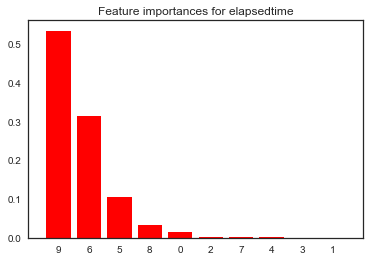

Prediction score: 0.74
Video 30: 
Feature ranking:
1. feature ref 9 (0.909630)
2. feature no_mixed_refs 6 (0.070988)
3. feature rc_lookahead 8 (0.005411)
4. feature no_fast_pskip 4 (0.003809)
5. feature no_mbtree 5 (0.003656)
6. feature no_8x8dct 0 (0.003153)
7. feature no_deblock 3 (0.002352)
8. feature no_cabac 2 (0.000590)
9. feature no_weightb 7 (0.000411)
10. feature no_asm 1 (0.000000)


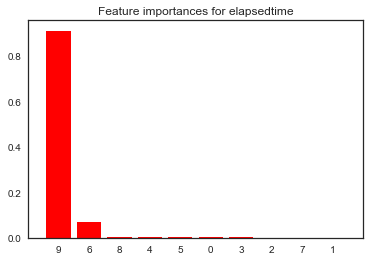

Prediction score: 0.85
Video 31: 
Feature ranking:
1. feature ref 9 (0.517836)
2. feature no_mixed_refs 6 (0.391606)
3. feature no_mbtree 5 (0.039369)
4. feature no_weightb 7 (0.037361)
5. feature no_8x8dct 0 (0.008226)
6. feature rc_lookahead 8 (0.002282)
7. feature no_deblock 3 (0.001157)
8. feature no_cabac 2 (0.001130)
9. feature no_fast_pskip 4 (0.001033)
10. feature no_asm 1 (0.000000)


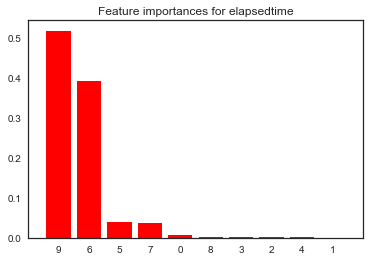

Prediction score: 2.42
Video 32: 
Feature ranking:
1. feature ref 9 (0.657699)
2. feature no_mixed_refs 6 (0.212244)
3. feature no_mbtree 5 (0.091700)
4. feature rc_lookahead 8 (0.022995)
5. feature no_8x8dct 0 (0.007032)
6. feature no_cabac 2 (0.006367)
7. feature no_deblock 3 (0.001111)
8. feature no_fast_pskip 4 (0.000485)
9. feature no_weightb 7 (0.000366)
10. feature no_asm 1 (0.000000)


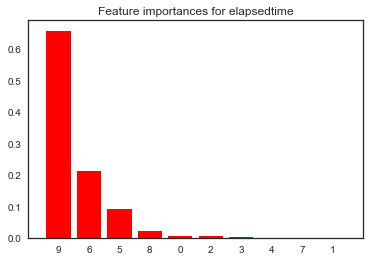

Prediction score: 0.67
Video 33: 
Feature ranking:
1. feature ref 9 (0.837900)
2. feature no_mixed_refs 6 (0.140163)
3. feature rc_lookahead 8 (0.006809)
4. feature no_8x8dct 0 (0.005387)
5. feature no_mbtree 5 (0.005026)
6. feature no_fast_pskip 4 (0.003131)
7. feature no_weightb 7 (0.000579)
8. feature no_cabac 2 (0.000570)
9. feature no_deblock 3 (0.000434)
10. feature no_asm 1 (0.000000)


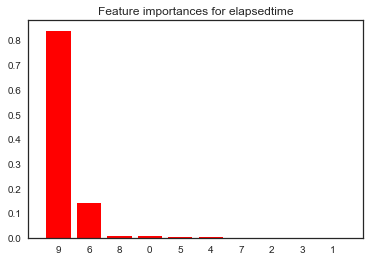

Prediction score: 0.63


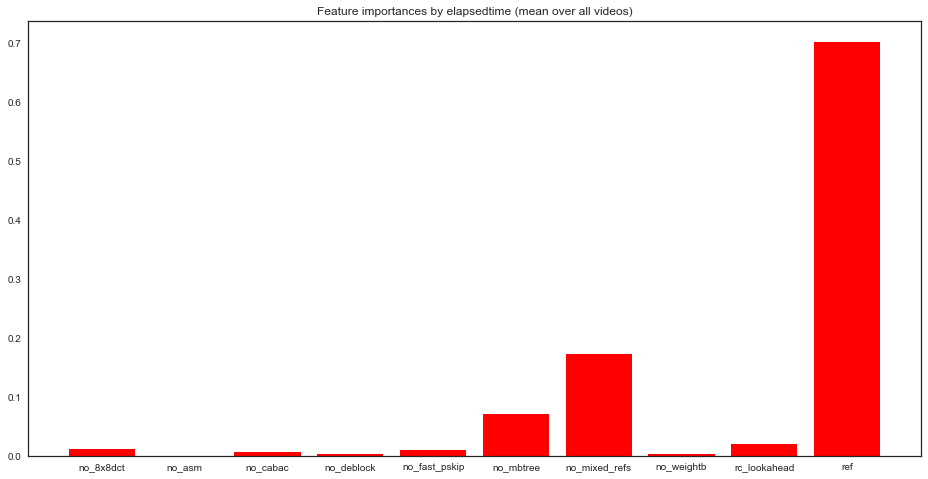

In [28]:
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split  
import numpy as np
from sklearn.metrics import accuracy_score, mean_absolute_error
import pandas as pd

#from sklearn.utils import check_arrays
def mean_relative_error(y_true, y_pred): 
    #y_true, y_pred = check_arrays(y_true, y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    # return mean_absolute_error(y_true, y_pred)

def ftImportancesByVideo(idVideo, predDimension='size'): 
    

    X, y = listeVideo[idVideo], listeVideo[idVideo][predDimension]
    X = X.drop(['H264', 'configurationID', 'usertime', 'systemtime', 'elapsedtime', 'size'],axis=1)
    clf = RandomForestRegressor(n_estimators=100)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)  
    #X_train = X[0:800]
    #X_test = X[801:1152]
    #y_train = y [0:800] 
    #y_test = y [801:1152]
    freg = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    importances = freg.feature_importances_
    indices = np.argsort(importances)[::-1]    

    print("Video %d: " % idVideo)
    # Print the feature ranking
    print("Feature ranking:")
    for f in range(len(indices)):
        print("%d. feature %s %d (%f)" % (f + 1, X.columns[indices[f]], indices[f], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances for " + predDimension)
    plt.bar(range(X.shape[1]), importances[indices],color="r", align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.show()
    acc = mean_relative_error (y_test,y_pred)
    print("Prediction score: %.2f" % (acc))
    return importances, indices


def plotGeneralFtImportances(importancePerFt, predDimension='size'):
    ftImpMean = [0]*(len(importancePerFt))
    for i in range(len(importancePerFt)):
        ftImpMean[i] = mean(importancePerFt[i])

    exampleVideo = listeVideo[0]
    exampleVideo = exampleVideo.drop(['H264', 'configurationID', 'usertime', 'systemtime', 'elapsedtime', 'size'],axis=1)

    ftNames = [""]*(len(exampleVideo.columns))

    for i in range(len(exampleVideo.columns)):
        ftNames[i] = exampleVideo.columns[i]

    plt.figure(figsize=(16, 8))
    plt.title("Feature importances by " + predDimension + " (mean over all videos)")
    plt.bar(ftNames, ftImpMean, color="r", align="center")
    plt.show()


predD = 'elapsedtime'
importancePerFt = np.zeros((10, len(listeVideo)), dtype='float') # [[] for i in range(10)] 
for idVideo in range(len(listeVideo)):
    imps, inds = ftImportancesByVideo(idVideo, predD)
    for i in range(len(imps)):
        importancePerFt[i][idVideo] = imps[i] #inds[i] #.append(inds[i])

plotGeneralFtImportances(importancePerFt, predD)




In [29]:
cor = stats.spearmanr([1,2,3,4,5],[5,6,7,8,7])
cor.correlation

0.82078268166812329

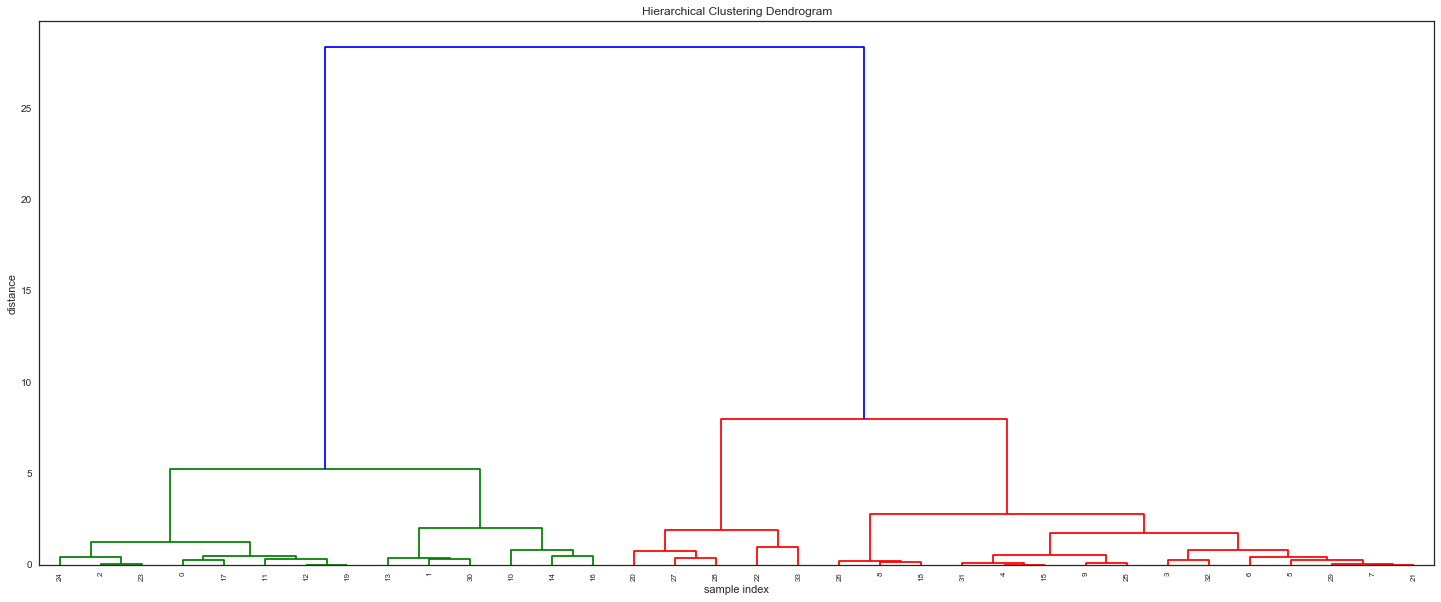

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import MeanShift
#Z = linkage(corrElap, 'average')
Z = linkage(corrTaille, 'ward')
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

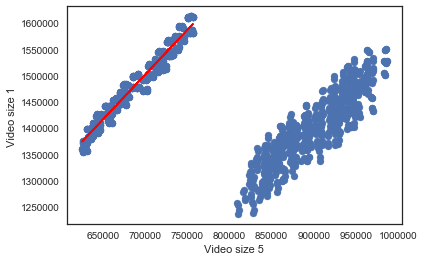

no_mbtree makes the difference and basically separates the two clusters!


In [31]:
v1ID = 5
v2ID = 1
v1 = listeVideo[v1ID]['size']
v2 = listeVideo[v2ID]['size']

plt.scatter(v1,v2)
plt.xlabel("Video size %d" % (v1ID))
plt.ylabel("Video size %d " % (v2ID))
np.corrcoef(v1,v2)[0,1]

v1m = v1[v1<800000]
v2m = v2[v1<800000]

slope, intercept, r_value, p_value, std_err = stats.linregress(v1m, v2m)
predictm = slope*v1m +intercept
plt.plot(v1m,predictm,color="red")
plt.show()

listeVideo[v1ID].take(v1m.index.values).describe(include='all')
print("no_mbtree makes the difference and basically separates the two clusters!")

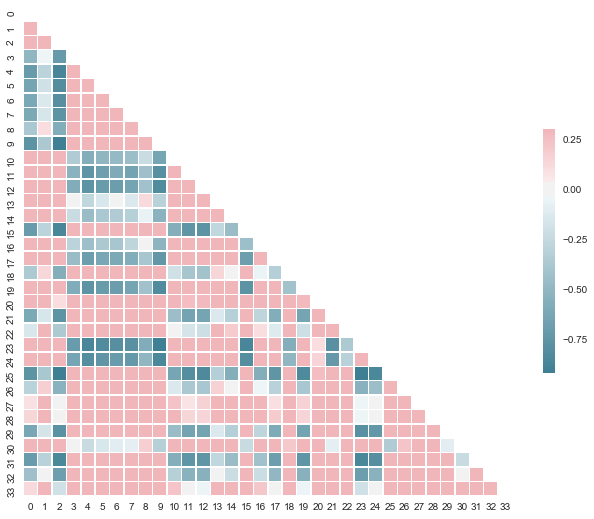

In [32]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="white")

# Generate a large random dataset
#rs = np.random.RandomState(33)
corr = pd.DataFrame(data=corrTaille)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

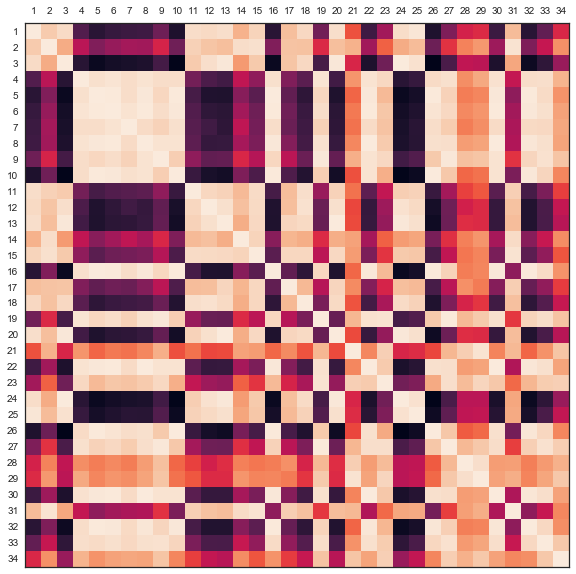

In [33]:
def plot_corr(corr,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns + 1)
    plt.yticks(range(len(corr.columns)), corr.columns + 1)

plot_corr(pd.DataFrame(corrTaille))


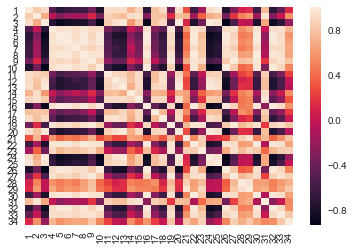

In [34]:
import seaborn as sns
%matplotlib inline

sns.set(style="white")
corr = pd.DataFrame(corrTaille)
sns.heatmap(corr, 
            xticklabels=corr.columns.values + 1,
            yticklabels=corr.columns.values + 1)
plt.show()

Method:	 ward


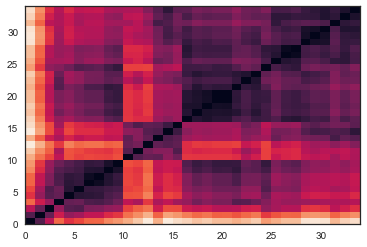

Method:	 single


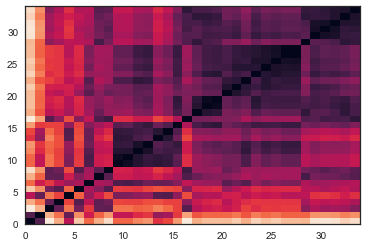

Method:	 average


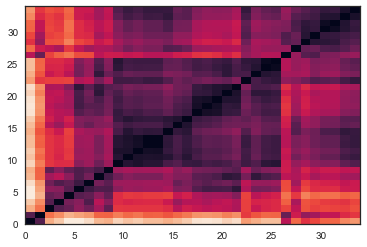

Method:	 complete


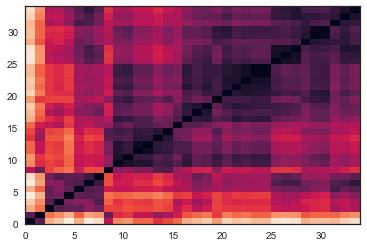

In [35]:
from scipy.spatial.distance import pdist, squareform
from fastcluster import linkage

import numpy as np
from scipy.spatial.distance import pdist, squareform, euclidean
from sklearn import datasets
from fastcluster import linkage

import matplotlib.pyplot as plt
%matplotlib inline

# https://docs.scipy.org/doc/scipy-0.14.0/reference/spatial.distance.html
# https://gmarti.gitlab.io/ml/2017/09/07/how-to-sort-distance-matrix.html
# http://www.sthda.com/english/wiki/correlation-matrix-a-quick-start-guide-to-analyze-format-and-visualize-a-correlation-matrix-using-r-software
# https://stackoverflow.com/questions/29432629/correlation-matrix-using-pandas
# https://en.wikipedia.org/wiki/Correlation_clustering
# https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

def seriation(Z,N,cur_index):
    '''
        input:
            - Z is a hierarchical tree (dendrogram)
            - N is the number of points given to the clustering process
            - cur_index is the position in the tree for the recursive traversal
        output:
            - order implied by the hierarchical tree Z
            
        seriation computes the order implied by a hierarchical tree (dendrogram)
    '''
    if cur_index < N:
        return [cur_index]
    else:
        left = int(Z[cur_index-N,0])
        right = int(Z[cur_index-N,1])
        return (seriation(Z,N,left) + seriation(Z,N,right))
    
def compute_serial_matrix(dist_mat,method="ward"):
    '''
        input:
            - dist_mat is a distance matrix
            - method = ["ward","single","average","complete"]
        output:
            - seriated_dist is the input dist_mat,
              but with re-ordered rows and columns
              according to the seriation, i.e. the
              order implied by the hierarchical tree
            - res_order is the order implied by
              the hierarhical tree
            - res_linkage is the hierarhical tree (dendrogram)
        
        compute_serial_matrix transforms a distance matrix into 
        a sorted distance matrix according to the order implied 
        by the hierarchical tree (dendrogram)
    '''
    N = len(dist_mat)
    flat_dist_mat = squareform(dist_mat)
    res_linkage = linkage(flat_dist_mat, method=method,preserve_input=True)
    res_order = seriation(res_linkage, N, N + N-2)
    seriated_dist = np.zeros((N,N))
    a,b = np.triu_indices(N,k=1)
    seriated_dist[a,b] = dist_mat[ [res_order[i] for i in a], [res_order[j] for j in b]]
    seriated_dist[b,a] = seriated_dist[a,b]
    
    return seriated_dist, res_order, res_linkage

methods = ["ward","single","average","complete"]
N = len(corrElap)
for method in methods:
    print("Method:\t",method)
    
    ordered_dist_mat, res_order, res_linkage = compute_serial_matrix(squareform(pdist(corrElap)),method) #hack
    
    plt.pcolormesh(ordered_dist_mat)
    plt.xlim([0,N])
    plt.ylim([0,N])
    plt.show()

In [36]:
np.argmin(corrTaille,axis=None)

807

In [37]:
np.unravel_index(np.argmin(corrTaille,axis=None), np.array(corrTaille).shape)

(23, 25)

-0.92453101951155603

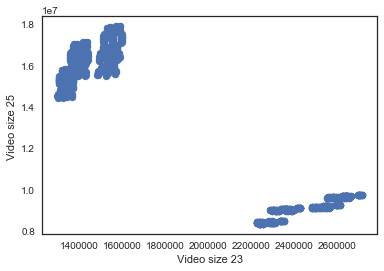

In [38]:
def plotCorrVideo(v1ID, v2ID,predDimension='size',plot=True):
    v1 = listeVideo[v1ID][predDimension]
    v2 = listeVideo[v2ID][predDimension]
    if plot:
        plt.figure()
        plt.scatter(v1,v2)
        plt.xlabel("Video %s %d" % (predDimension, v1ID))
        plt.ylabel("Video %s %d " % (predDimension, v2ID))
    return np.corrcoef(v1,v2)[0,1]
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmin.html
# seeking where the lowest correlation occurs (btw 2 videos)
np.unravel_index(np.argmin(corrTaille,axis=None), np.array(corrTaille).shape)
plotCorrVideo(23, 25)

In [39]:
v1ID=23
v1=listeVideo[v1ID]['size']
orderv1 = v1.argsort()
ranksv1 = orderv1.argsort()


v2ID=25
v2=listeVideo[v2ID]['size']
orderv2 = v2.argsort()
ranksv2 = orderv2.argsort()

ranksv1, orderv2[137] # ranksv1 - ranksv2



(0        137
 1        387
 2        749
 3        895
 4        226
 5        452
 6        246
 7        438
 8        177
 9        166
 10       148
 11       225
 12       494
 13       700
 14       461
 15       497
 16      1106
 17      1143
 18      1141
 19       506
 20       500
 21       328
 22      1097
 23       948
 24       945
 25      1114
 26      1099
 27       897
 28       439
 29       894
         ... 
 1122     247
 1123    1025
 1124     125
 1125     152
 1126     460
 1127     135
 1128     453
 1129     224
 1130     660
 1131     934
 1132     654
 1133    1115
 1134     455
 1135     953
 1136     819
 1137     667
 1138    1140
 1139     454
 1140     829
 1141     570
 1142      49
 1143     863
 1144      56
 1145     476
 1146      70
 1147    1035
 1148     946
 1149     750
 1150     898
 1151    1096
 Name: size, dtype: int64, 438)

Coefficients: 
 [  1.53700227e+00   4.03375832e+05]
Mean squared error: 688751290.67
Variance score: 0.90


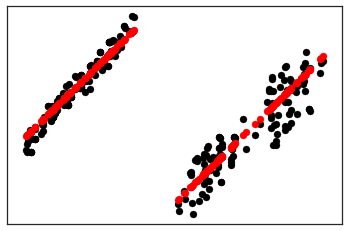

0.90012551499112003

In [40]:
# transfer learning with v1 and v5 
# FIXME: plot
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

v1ID = 5
v2ID = 1
v1 = listeVideo[v1ID]
v2 = listeVideo[v2ID]

# Split the targets into training/testing sets
x_train = v1[['size', 'no_mbtree']][0:800] # .reshape(-1,2)
y_train = v2['size'][0:800]

x_test = v1[['size', 'no_mbtree']][801:1052] # .reshape(-1,2)
y_test = v2['size'][801:1052]


regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

y_predict2 = 1.53700227*x_test['size']+ 4.03375832e+05*x_test['no_mbtree'] + regr.intercept_

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
     % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))



# Plot outputs

plt.figure()
# plt.scatter(x_train['size'], y_train,  color='red')
plt.scatter(x_test['size'], y_test,  color='black')
plt.scatter(x_test['size'], y_pred,  color='red')
#plt.plot(x_test['size'], y_predict2, color='blue')

plt.xticks(())
plt.yticks(())

plt.show()
r2_score(y_test, y_predict2) 


In [41]:
# showing that some videos are equivalent (wrt configurations and correlations) and one of them is "cheaper" (execution time per configuration is less)
x = listeVideo[3]['size']
y = listeVideo[4]['size']
np.corrcoef(x, y)[0, 1], mean(listeVideo[3]['elapsedtime']), mean(listeVideo[4]['elapsedtime'])

(0.94551078082360795, 3.8139479166666663, 10.989633680555555)

In [42]:
%%capture
# transfer learning 
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


## Domain knowledge for transfer function
def mkFeatures2Focus(predDimension):
    possibleColumns=['idVideo','no_8x8dct','no_asm','no_cabac',
                           'no_deblock','no_fast_pskip','no_mbtree',
                           'no_mixed_refs','no_weightb','rc_lookahead','ref']
    ftToFocus = []
    if predDimension == 'size':
        ftToFocus = [] # ['no_mbtree', 'no_cabac']
    elif predDimension == 'elapsedtime':
        ftToFocus = [] # ['ref', 'no_mixed_refs', 'no_mbtree'] # []
    else:
        print("Error: predDimension is either size or elapsedtime")
    return ftToFocus

def evalPrediction(y_gtruth, y_pred):
     # The mean squared error
    mse = mean_squared_error(y_gtruth, y_pred)
   # print("Mean squared error: %.2f" % mse)
    # Explained variance score: 1 is perfect prediction
    r2 = r2_score(y_gtruth, y_pred)
   # print('Variance score: %.2f' % r2)   
    mre = mean_relative_error(y_gtruth, y_pred)
   # print('Relative score: %.2f' % mre)
    return mse, r2, mre

def transferReg(v1ID, v2ID, perc, predDimension='size'):
    vSource = listeVideo[v1ID]
    vTarget = listeVideo[v2ID]
    
    nTotal = len(vSource[predDimension]) # length is equal between vSource and vTarget (1052 in our experiments)
    tres = round(perc * nTotal)
    
    ######### pure learnning over target (it's the traditional way, without transfer)  ##########  
    clfTarget = RandomForestRegressor(n_estimators=100)  
    
    # train sample 
    x_target_train = vTarget[0:tres] # Cs
    x_effective_target_train = x_target_train.drop(['configurationID', 'size', 'elapsedtime', 'systemtime', 'usertime'], axis=1) # normally we learn over the full parameters but we can try to target specifically ['no_mbtree', 'no_cabac']
    # x_effective_target_train = x_effective_target_train[['no_mbtree', 'no_cabac']] 
    y_target_train = vTarget[predDimension][0:tres] 
    clfTarget.fit(x_effective_target_train, y_target_train) 
    
    # test sample for evaluating 
    x_target_test = vTarget[tres+1:nTotal]
    x_effective_target_test = x_target_test.drop(['configurationID', 'size', 'elapsedtime', 'systemtime', 'usertime'], axis=1) # normally we learn over the full parameters but we can try to target specifically ['no_mbtree', 'no_cabac']
    # x_effective_source_test = x_effective_source_test[['no_mbtree', 'no_cabac']]
    y_target_test = vTarget[predDimension][tres+1:nTotal]
    
   # print("** Evaluation of learning model (for the TARGET, without transfer)**")
    y_target_pred = clfTarget.predict(x_effective_target_test)
    mseMLTarget, r2MLTarget, mreMLTarget = evalPrediction(y_target_test, y_target_pred)
   
    
    #### Now let's try ML + Transfer
    
    ######### first, we need a learning model for predicting size (source), hopefully very accurate ##########  
    clf = RandomForestRegressor(n_estimators=100)    
    x_source_train = vSource[0:tres] # Cs
    x_effective_source_train = x_source_train.drop(['configurationID', 'size', 'elapsedtime', 'systemtime', 'usertime'], axis=1) # normally we learn over the full parameters but we can try to target specifically ['no_mbtree', 'no_cabac']
    # x_effective_source_train = x_effective_source_train[['no_mbtree', 'no_cabac']] 
    y_source_train = vSource[predDimension][0:tres] 
    clf.fit(x_effective_source_train, y_source_train) # RT
    
    # intermediate evaluation of learning model
    x_source_test = vSource[tres+1:nTotal]
    x_effective_source_test = x_source_test.drop(['configurationID', 'size', 'elapsedtime', 'systemtime', 'usertime'], axis=1) # normally we learn over the full parameters but we can try to target specifically ['no_mbtree', 'no_cabac']
   # x_effective_source_test = x_effective_source_test[['no_mbtree', 'no_cabac']]
    y_source_test = vSource[predDimension][tres+1:nTotal]
    
    y_source_pred = clf.predict(x_effective_source_test)
  #  print("** Intermediate evaluation of learning model for the SOURCE hopefully very accurate **")
    mseMLSource, r2MLSource, mreMLSource = evalPrediction(y_source_test, y_source_pred)    

    ####### second, let's learn the transfer function between source and target ############
    ftsToFocus = mkFeatures2Focus(predDimension)
    ftsToFocus.append(predDimension)
  
    
    x_transfer_train = x_source_train[ftsToFocus] # source [['size', 'no_mbtree', 'no_cabac']]
    y_transfer_train = vTarget[predDimension][0:tres] # Cboth (target)
    regr = linear_model.LinearRegression() # linear_model.BayesianRidge() # linear_model.LinearRegression() # linear_model.Ridge (alpha = .5) 
    regr.fit(x_transfer_train, y_transfer_train)  
    # The coefficients
  #  print('Coefficients: \n', regr.coef_)      
    ##### evaluation is really intermediate here, 
    ##### it is mostly here to have an idea on the quality of the transfer function (it does not combine learning + transf)
    # now let's evaluate that our transfer model works over a testing sample  
    #x_test = vSource[tres+1:nTotal]
    #x_effective_test = x_test.drop(['configurationID', 'size', 'elapsedtime', 'systemtime', 'usertime'], axis=1)
    #x_test =  x_test [['no_mbtree', 'no_cabac']]
    #y_test = vTarget[predDimension][tres+1:nTotal] #  # 
    #y_reg_pred = regr.predict(x_test[[predDimension, 'no_mbtree', 'no_cabac']])
    #print("*** Assesment of linear regression (once size has been learned, intermediate result) ***")
    #mseReg = mean_squared_error(y_test, y_reg_pred)
    #print("Mean squared error: %.2f" % (mseL))
    # Explained variance score: 1 is perfect prediction
    #r2Reg = r2_score(y_test, y_reg_pred)
    #print('Variance score: %.2f' % (r2L))
    #mreReg = mean_relative_error(y_test, y_reg_pred)
    #print('Relative score: %.2f' % mreReg)
    #plt.figure()
    # plt.scatter(x_train['size'], y_train,  color='red')
    #plt.scatter(x_test[predDimension], y_test,  color='black')
    #plt.scatter(x_test[predDimension], y_reg_pred,  color='red')
    #plt.plot(x_test['size'], y_predict2, color='blue')
    #plt.xticks(())
    #plt.yticks(())
    #plt.show()
    #print("*** ***")
       
    
    ########### third, transfer + learning  
    x_test = vTarget[tres+1:nTotal]
    x_effective_test = x_test.drop(['configurationID', 'size', 'elapsedtime', 'systemtime', 'usertime'], axis=1)
    target_prediction_size = clf.predict(x_effective_test)
    #x_test =  x_test [['no_mbtree', 'no_cabac']]
    # print("Unique prediction values %d" % (len(np.unique(target_prediction_size))))
    # add predicted size to x_test
    x_augmented_test = x_effective_test.assign(predDimension=target_prediction_size) 
    x_augmented_test = x_augmented_test.rename(columns={'predDimension': predDimension}) # WEIRD (TODO)
    y_test = y_target_test # vTarget[predDimension][tres+1:nTotal] #  #     
    # Make predictions using the testing set
    y_pred = regr.predict(x_augmented_test[ftsToFocus])

 #   print("*** Learning + transfer")
    mseMLT, r2MLT, mreMLT = evalPrediction(y_test, y_pred)
    
    #plt.figure()
    # plt.scatter(x_train['size'], y_train,  color='red')
    #plt.scatter(x_augmented_test[predDimension], y_test,  color='black')
    #plt.scatter(x_augmented_test[predDimension], y_pred,  color='red')
    #plt.plot(x_test['size'], y_predict2, color='blue')

    #plt.xticks(())
    #plt.yticks(())

    #plt.show()
    # (mseMLSource, r2MLSource, mreMLSource), 
    return (mseMLTarget, r2MLTarget, mreMLTarget), (mseMLT, r2MLT, mreMLT)
   
## Deprecated 
def linearReg(v1ID, perc, predDimension='size'):
    v1 = listeVideo[v1ID]    
    nTotal = len(v1[predDimension])
    tres = round(perc * nTotal)   


    # Split the targets into training/testing sets
    x_train = v1[['no_mbtree', 'no_cabac']][0:tres] #.values.reshape(-1,1)
    y_train = v1[predDimension][0:tres]#.values.reshape(-1,1)
    
    x_test = v1[['no_mbtree', 'no_cabac']][tres+1:nTotal]#.values.reshape(-1,1)
    y_test = v1[predDimension][tres+1:nTotal]#.values.reshape(-1,1)
    
    #print(np.unique(y_test))

    regr = linear_model.LinearRegression()
    regr.fit(x_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(x_test)
    
    #print(np.unique(y_pred))
    
    #plt.figure()
    #plt.scatter(y_test, y_test,  color='black')
    #plt.scatter(y_pred, y_pred,  color='red')
    #plt.scatter(x_augmented_test[predDimension], y_test,  color='black')
    #plt.scatter(x_augmented_test[predDimension], y_pred,  color='red')
    #plt.plot(x_test['size'], y_predict2, color='blue')

    #plt.xticks(())
    #plt.yticks(())

    #plt.show()


    # The coefficients
    print('Coefficients: \n', regr.coef_)
    mreReg, r2Reg, mseReg = evalPrediction(y_test, y_pred)
    return (mreReg, r2Reg, mseReg)

def linearRegBetweenVideos(v1Source, v2Target, perc, predDimension='size'):
    vSource = listeVideo[v1Source]  
    vTarget = listeVideo[v2Target]  
    nTotal = len(vSource[predDimension])
    tres = round(perc * nTotal)   
    
    ftToFocus = mkFeatures2Focus(predDimension)
    ftToFocus.append(predDimension)

    # Split the targets into training/testing sets
    x_train = vSource[ftToFocus][0:tres] #.values.reshape(-1,1)
    y_train = vTarget[predDimension][0:tres]#.values.reshape(-1,1)
    
    x_test = vSource[ftToFocus][tres+1:nTotal]#.values.reshape(-1,1)
    y_test = vTarget[predDimension][tres+1:nTotal]#.values.reshape(-1,1)
    
    #print(np.unique(y_test))

    regr = linear_model.LinearRegression()
    regr.fit(x_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(x_test)
    
    #print(np.unique(y_pred))
    
    #plt.figure()
    #plt.scatter(y_test, y_test,  color='black')
    #plt.scatter(y_pred, y_pred,  color='red')
    #plt.scatter(x_augmented_test[predDimension], y_test,  color='black')
    #plt.scatter(x_augmented_test[predDimension], y_pred,  color='red')
    #plt.plot(x_test['size'], y_predict2, color='blue')

    #plt.xticks(())
    #plt.yticks(())

    #plt.show()


    # The coefficients
   # print('Coefficients: \n', regr.coef_)
    mreReg, r2Reg, mseReg = evalPrediction(y_test, y_pred)
    return (mreReg, r2Reg, mseReg)

# transferReg(1, 5, (N / 1152)) # great achievement!

N = 16

def computeTransferAndReg(vid1,vid2,n=16,predDimension='size'):
    print("Video %d vs %d" % (vid1,vid2));
    cor12 = plotCorrVideo(vid1,vid2,predDimension,False)
    #print("Correlation %.2f" % (cor12))
   # print("Transfer learning...")
    mreL, mreT = transferReg(vid1, vid2, (n / 1152), predDimension) 
    #print("Simple regression linear model (to check if it is that simple) for source video %d" % (vid1))
    mre1 = linearRegBetweenVideos(vid1, vid2, (n / 1152), predDimension)
    #print("Simple regression linear model (to check if it is that simple) for target video %d" % (vid2))
    mre2 = linearRegBetweenVideos(vid2, vid1, (n / 1152), predDimension)
    return mreL, mreT, mre1, mre2
    # TODO: tree learning over vid1
    
    


# print("Correlation %.2f" % (plotCorrVideo(1,2)))
# transferReg(1, 2, (N / 1152)) # great achievement!

#linearReg(5, (N / 1152))
#linearReg(1, (N / 1152))
#linearReg(3, (N / 1152))
#transferReg(1, 3, (N / 1152))


# transferReg(1, 5, (5*N / 1152)) # 
# transferReg(5, 1, (3*N / 1152)) # great achievement!
#mreL, mreT, mre1, mre2 = computeTransferAndReg(33, 18, n=10*N, predDimension='elapsedtime') 

In [43]:
def computeRegs(vid1,vid2,n=16,predDimension='size'):
    print("Video %d vs %d" % (vid1,vid2))
    print("Simple regression linear model (to check if it is that simple) for source video %d" % (vid1))
    mre1 = linearRegBetweenVideos(vid1, vid2, (n / 1152), predDimension)
    print("Simple regression linear model (to check if it is that simple) for target video %d" % (vid2))
    mre2 = linearRegBetweenVideos(vid2, vid1, (n / 1152), predDimension)
    return mre1, mre2

def launchRegExperiment(predDimension='size'):
    mreAllReg = []
    for nSample in Nf:    
        mres = []
        print("#######\t Nf=%d \t\t#########" % (nSample))
        for i in range(0,len(listeVideo)):        
            for j in range(0,len(listeVideo)):
                if i == j:
                    continue 
                mre1, mre2 = computeRegs(i, j, n=nSample*N, predDimension=predDimension)
                # print("\t MRE learning %.2f MRE transfer %.2f MRE reg %.2f MRE reg %.2f" % (mreL, mreT, mre1, mre2))
                # print("\n\n\n")
                mres.append((mre1, mre2))
        mreAllReg.append(mres)
    return mreAllReg

def analyzeRegAccuracies(nnf, mres):
    mres = mres[nnf] 
    mreReg1 = [] 
    mreReg2 = []
    for i in range(len(mres)):
        mre = mres[i]
        mreReg1.append(mre[0])
        mreReg2.append(mre[1])
    pdReg1 = pd.DataFrame(mreReg1)
    pdReg2 = pd.DataFrame(mreReg2)
    print("Reg1 %s" % (pdReg1.describe()))
    print("Reg2 %s" % (pdReg2.describe()))
    print("Reg1 vs Reg2 %s" % (pdReg2.subtract(pdReg1).describe()))

#mreAllReg = launchRegExperiment('elapsedtime')
#for i in range(len(Nf)):
   # print("For sampling size: %d" % (Nf[i] * N))
    #analyzeRegAccuracies(i, mreAllReg)
    #print("*****\n\n")


In [44]:
Nf = [3] # [1, 2, 3, 4, 5, 10]

def launchExperiment(predDimension):
    mreAll = []
    for nSample in Nf:    
        mres = []
        print("#######\t Nf=%d \t\t#########" % (nSample))
        for i in range(0,len(listeVideo)):        
            for j in range(0,len(listeVideo)):
                if i == j:
                    continue 
                mreL, mreT, mre1, mre2 = computeTransferAndReg(i, j, n=nSample*N, predDimension=predDimension)
                # print("\t MRE learning %.2f MRE transfer %.2f MRE reg %.2f MRE reg %.2f" % (mreL, mreT, mre1, mre2))
                # print("\n\n\n")
                mres.append((mreL, mreT, mre1, mre2))
        mreAll.append(mres)
    return mreAll
#mreL, mreT, mre1, mre2 = computeTransferAndReg(32, 2, n=N*3, predDimension='elapsedtime')
#print("MRE learning %.2f MRE transfer %.2f MRE reg %.2f MRE reg %.2f" % (mreL, mreT, mre1, mre2))
# linearReg(2, (N*10 / 1152), 'elapsedtime')
# computeTransferAndReg(2, 3, n=3*N, predDimension='size') # learning pays off here

def analyzeAccuracies(nnf, mres):
    mres = mres[nnf]
    mreLearning = []
    mreT = [] 
    mreReg1 = [] 
    mreReg2 = []
    for i in range(len(mres)):
        mre = mres[i]
        mreLearning.append(mre[0])
        mreT.append(mre[1])
        mreReg1.append(mre[2])
        mreReg2.append(mre[3])
    pdLearning = pd.DataFrame(mreLearning)
    pdT = pd.DataFrame(mreT)
    pdReg1 = pd.DataFrame(mreReg1)
    pdReg2 = pd.DataFrame(mreReg2)
    # pdLearning.subtract(pdT).describe()
    print("Transfer vs learning %s " % (pdT.subtract(pdLearning).describe()))
    print("Transfer vs reg1 %s" % (pdT.subtract(pdReg1).describe()))
    print("Transfer vs reg2 %s" % (pdT.subtract(pdReg2).describe()))
    print("Reg1 vs Reg2 %s" % (pdReg1.subtract(pdReg2).describe()))
    print("Reg1 vs learning%s" % (pdReg1.subtract(pdLearning).describe()))
    print("Reg2 vs learning%s" % (pdReg2.subtract(pdLearning).describe()))

#mreAll = launchExperiment('size')
#for i in range(len(Nf)):
 #   print("For sampling size: %d" % (Nf[i] * N))
 #   analyzeAccuracies(i, mreAll)
 #   print("*****\n\n")

In [45]:
config = listeVideo[1][['no_mbtree', 'no_cabac']]
s = listeVideo[1][['size']]
#config = config.assign(size=s)
predDimension='size'
config = config.assign(predDimension=s)
config = config.rename(columns={'predDimension': predDimension})
config
config[[predDimension]]


,size
0,1290016
1,1407335
2,1442216
3,1511158
4,1421425
5,1488528
6,1441000
7,1527852
8,1405923
9,1333677


In [46]:
linearRegBetweenVideos(3, 3, perc=((N*3)/1052),predDimension='elapsedtime')

(0.0, 1.0, 0.0)

In [47]:
efts = mkFeatures2Focus('size')
efts.append('size')
efts

['size']